# Final Project, Part 4: Technical Notebook

## Build and document a working model.
By now, you're ready to apply your modeling skills to make machine learning predictions. Your goal for this project is to develop a working predictive model or process to resolve your problem statement. You should document your work in a technical notebook that can be shared with your peers.

Build upon your earlier EDA notebook, expanding on your statistical analysis, and include your final model, along with any specific performance metrics and evaluation criteria. Organize your information clearly for an external audience, including a table of contents and clearly demarcated sections, using markdown to create subheaders or descriptions as needed. Finally, include comments on all of your code.

## Requirements

A detailed Jupyter Notebook with a summary of your: statistical analysis, model, and evaluation metrics.
Use markdown to clearly organize all of your notebook's information.
Include comments on all of your code.
Note: Here are some things to consider in your notebook: sample size, correlations, feature importance, unexplained variance or outliers, variable selection, train/test comparison, and any relationships between your target and independent variables.


- Try Linear Regression, Decision Trees/Random Forests
- Do 5 folds Cross Validation, and examine metrics



Problem Statement:

Can we predict attractiveness based on non-image data?  Does it differ for males vs females?


In [258]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
 
%matplotlib inline

In [292]:
# Read data
data = pd.read_csv('Speed Dating Data.csv')
print data.shape
data.columns

(8378, 195)


Index([u'iid', u'id', u'gender', u'idg', u'condtn', u'wave', u'round',
       u'position', u'positin1', u'order',
       ...
       u'attr3_3', u'sinc3_3', u'intel3_3', u'fun3_3', u'amb3_3', u'attr5_3',
       u'sinc5_3', u'intel5_3', u'fun5_3', u'amb5_3'],
      dtype='object', length=195)

In [293]:
# Extract Columns of interest
columns = [u'iid', u'gender', u'wave', u'attr_o', u'goal', u'date', u'go_out', 
       u'exphappy', u'expnum', u'attr3_1', u'sinc3_1', u'fun3_1', u'intel3_1',
       u'amb3_1']
data = data[columns]

In [294]:
# Remove Waves 6-9 due to different scaling of attr3_1
data = data[(data.wave < 6) | (data.wave > 9)]

#Drop Wave column, no longer needed
data.drop('wave', axis=1, inplace=True)

In [295]:
# Let's look for missing data
data.groupby(['iid']).max().isnull().sum().sort_values(ascending=False)

expnum      323
amb3_1        8
intel3_1      8
fun3_1        8
sinc3_1       8
attr3_1       8
exphappy      7
date          7
go_out        6
goal          6
attr_o        0
gender        0
dtype: int64

In [296]:
# Drop expnum column, too many missing values
data.drop('expnum', axis=1, inplace=True)

# Filter out people (iid) that did not complete attr3_1 survey
dfnew = data.groupby('iid').filter(lambda x: pd.isnull(x['attr3_1'].max())==False)

# Replace nulls with mean
dfnew.fillna(dfnew.mean(), inplace=True);

# Check nulls again
dfnew.groupby(['iid']).max().isnull().sum().sort_values(ascending=False)


amb3_1      0
intel3_1    0
fun3_1      0
sinc3_1     0
attr3_1     0
exphappy    0
go_out      0
date        0
goal        0
attr_o      0
gender      0
dtype: int64

In [297]:
df = pd.DataFrame(dfnew.groupby('iid')['attr_o'].mean())
df.sort_values('attr_o', ascending=False).head()


,attr_o
iid,
268,8.500000
440,8.400000
444,8.400000
91,8.388889
327,8.333333


In [327]:
# Look at prediction variable attr_o of all people
#dfnew.groupby(['iid']).attr_o.boxplot(vert=False) #.T.boxplot(vert=False)
df1 = dfnew.groupby('iid')['attr_o'].apply(list)
df1 = pd.DataFrame(df1)
df1['mean_attr_o'] = df.attr_o
df1_sorted = df1.sort_values('mean_attr_o', ascending=False)
df1_sorted = pd.DataFrame(df1_sorted)
#df1 = df1.set_index('iid')
print df1_sorted
#df.T.boxplot()
#plt.figure()
#plt.boxplot(df1.attr_o, 0, 'rs', 0, 0.75)


                                                attr_o  mean_attr_o
iid                                                                
268  [10.0, 8.0, 9.0, 8.0, 9.0, 7.0, 8.0, 6.0, 10.0...     8.500000
440  [8.0, 7.0, 9.0, 8.0, 8.0, 10.0, 10.0, 10.0, 6....     8.400000
444  [7.0, 8.0, 10.0, 8.0, 9.0, 8.0, 10.0, 8.0, 8.0...     8.400000
91   [9.0, 7.0, 8.0, 8.0, 10.0, 9.0, 9.0, 8.0, 7.0,...     8.388889
327     [9.0, 7.0, 9.0, 7.0, 8.0, 10.0, 8.0, 9.0, 8.0]     8.333333
468  [7.0, 9.0, 10.0, 9.0, 10.0, 9.0, 4.0, 10.0, 8....     8.333333
467  [8.0, 8.0, 7.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, ...     8.333333
404  [9.0, 9.0, 8.0, 8.0, 10.5, 10.0, 10.0, 7.0, 9....     8.305556
62   [9.0, 10.0, 8.0, 8.0, 8.0, 10.0, 7.0, 7.0, 10....     8.300000
375  [10.0, 10.0, 6.15075153374, 8.0, 10.0, 8.0, 8....     8.207538
8    [8.0, 8.0, 10.0, 8.0, 9.0, 8.0, 6.0, 9.0, 8.0,...     8.200000
14   [7.0, 7.0, 9.0, 8.0, 8.0, 8.0, 7.0, 8.0, 10.0,...     8.200000
27   [9.0, 8.0, 8.0, 7.0, 9.0, 8.0, 9.0, 7.0, 8.

** Trying to get horizontal box plots of iid sorted by mean descending **

In [334]:

df2=df1_sorted.iloc[:0]
print df2
#pd.concat(df2, pd.DataFrame(df1_sorted.attr_o.values.tolist()))
#df2[0:10]


Empty DataFrame
Columns: [attr_o, mean_attr_o]
Index: []


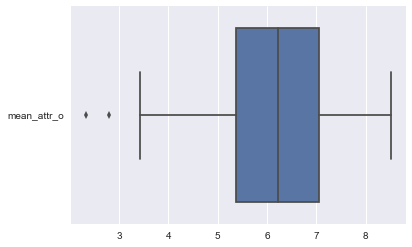

In [308]:
sns.boxplot(data=df1_sorted, orient='h')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001BCCFEF0>]], dtype=object)

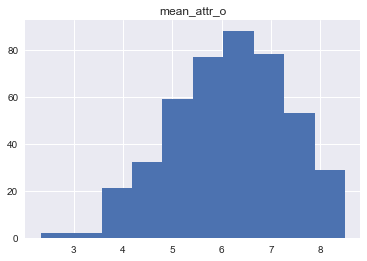

In [311]:
df1_sorted.hist()

In [316]:
print df1[df1 < 5.2].count()/df1.count()
print df1[df1 > 7.0].count()/df1.count()
df1.describe()

attr_o         0.000000
mean_attr_o    0.222222
dtype: float64
attr_o         1.000000
mean_attr_o    0.256236
dtype: float64


,mean_attr_o
count,441.000000
mean,6.166055
std,1.164217
min,2.333333
25%,5.368421
50%,6.222222
75%,7.045455
max,8.500000


** Should we classify by lower 25, mid, and upper 25%? **

In [183]:
# Create matrix of participants based on mean of each column
p_mtx = dfnew.groupby(['iid']).mean()

In [184]:
p_mtx.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,441.0,0.505669,0.500536,0.000000,0.000000,1.000000,1.000000,1.0
attr_o,441.0,6.166055,1.164217,2.333333,5.368421,6.222222,7.045455,8.5
goal,441.0,2.163265,1.446190,1.000000,1.000000,2.000000,2.000000,6.0
date,441.0,4.984187,1.479320,1.000000,4.000000,5.000000,6.000000,7.0
go_out,441.0,2.138322,1.146697,1.000000,1.000000,2.000000,3.000000,7.0
exphappy,441.0,5.563717,1.759532,1.000000,5.000000,6.000000,7.000000,10.0
attr3_1,441.0,7.011338,1.408532,2.000000,6.000000,7.000000,8.000000,10.0
sinc3_1,441.0,8.249433,1.433814,2.000000,7.000000,8.000000,9.000000,10.0
fun3_1,441.0,7.675737,1.570054,2.000000,7.000000,8.000000,9.000000,10.0
intel3_1,441.0,8.324263,1.096099,3.000000,8.000000,8.000000,9.000000,10.0


In [185]:
print p_mtx.columns

Index([u'gender', u'attr_o', u'goal', u'date', u'go_out', u'exphappy',
       u'attr3_1', u'sinc3_1', u'fun3_1', u'intel3_1', u'amb3_1'],
      dtype='object')


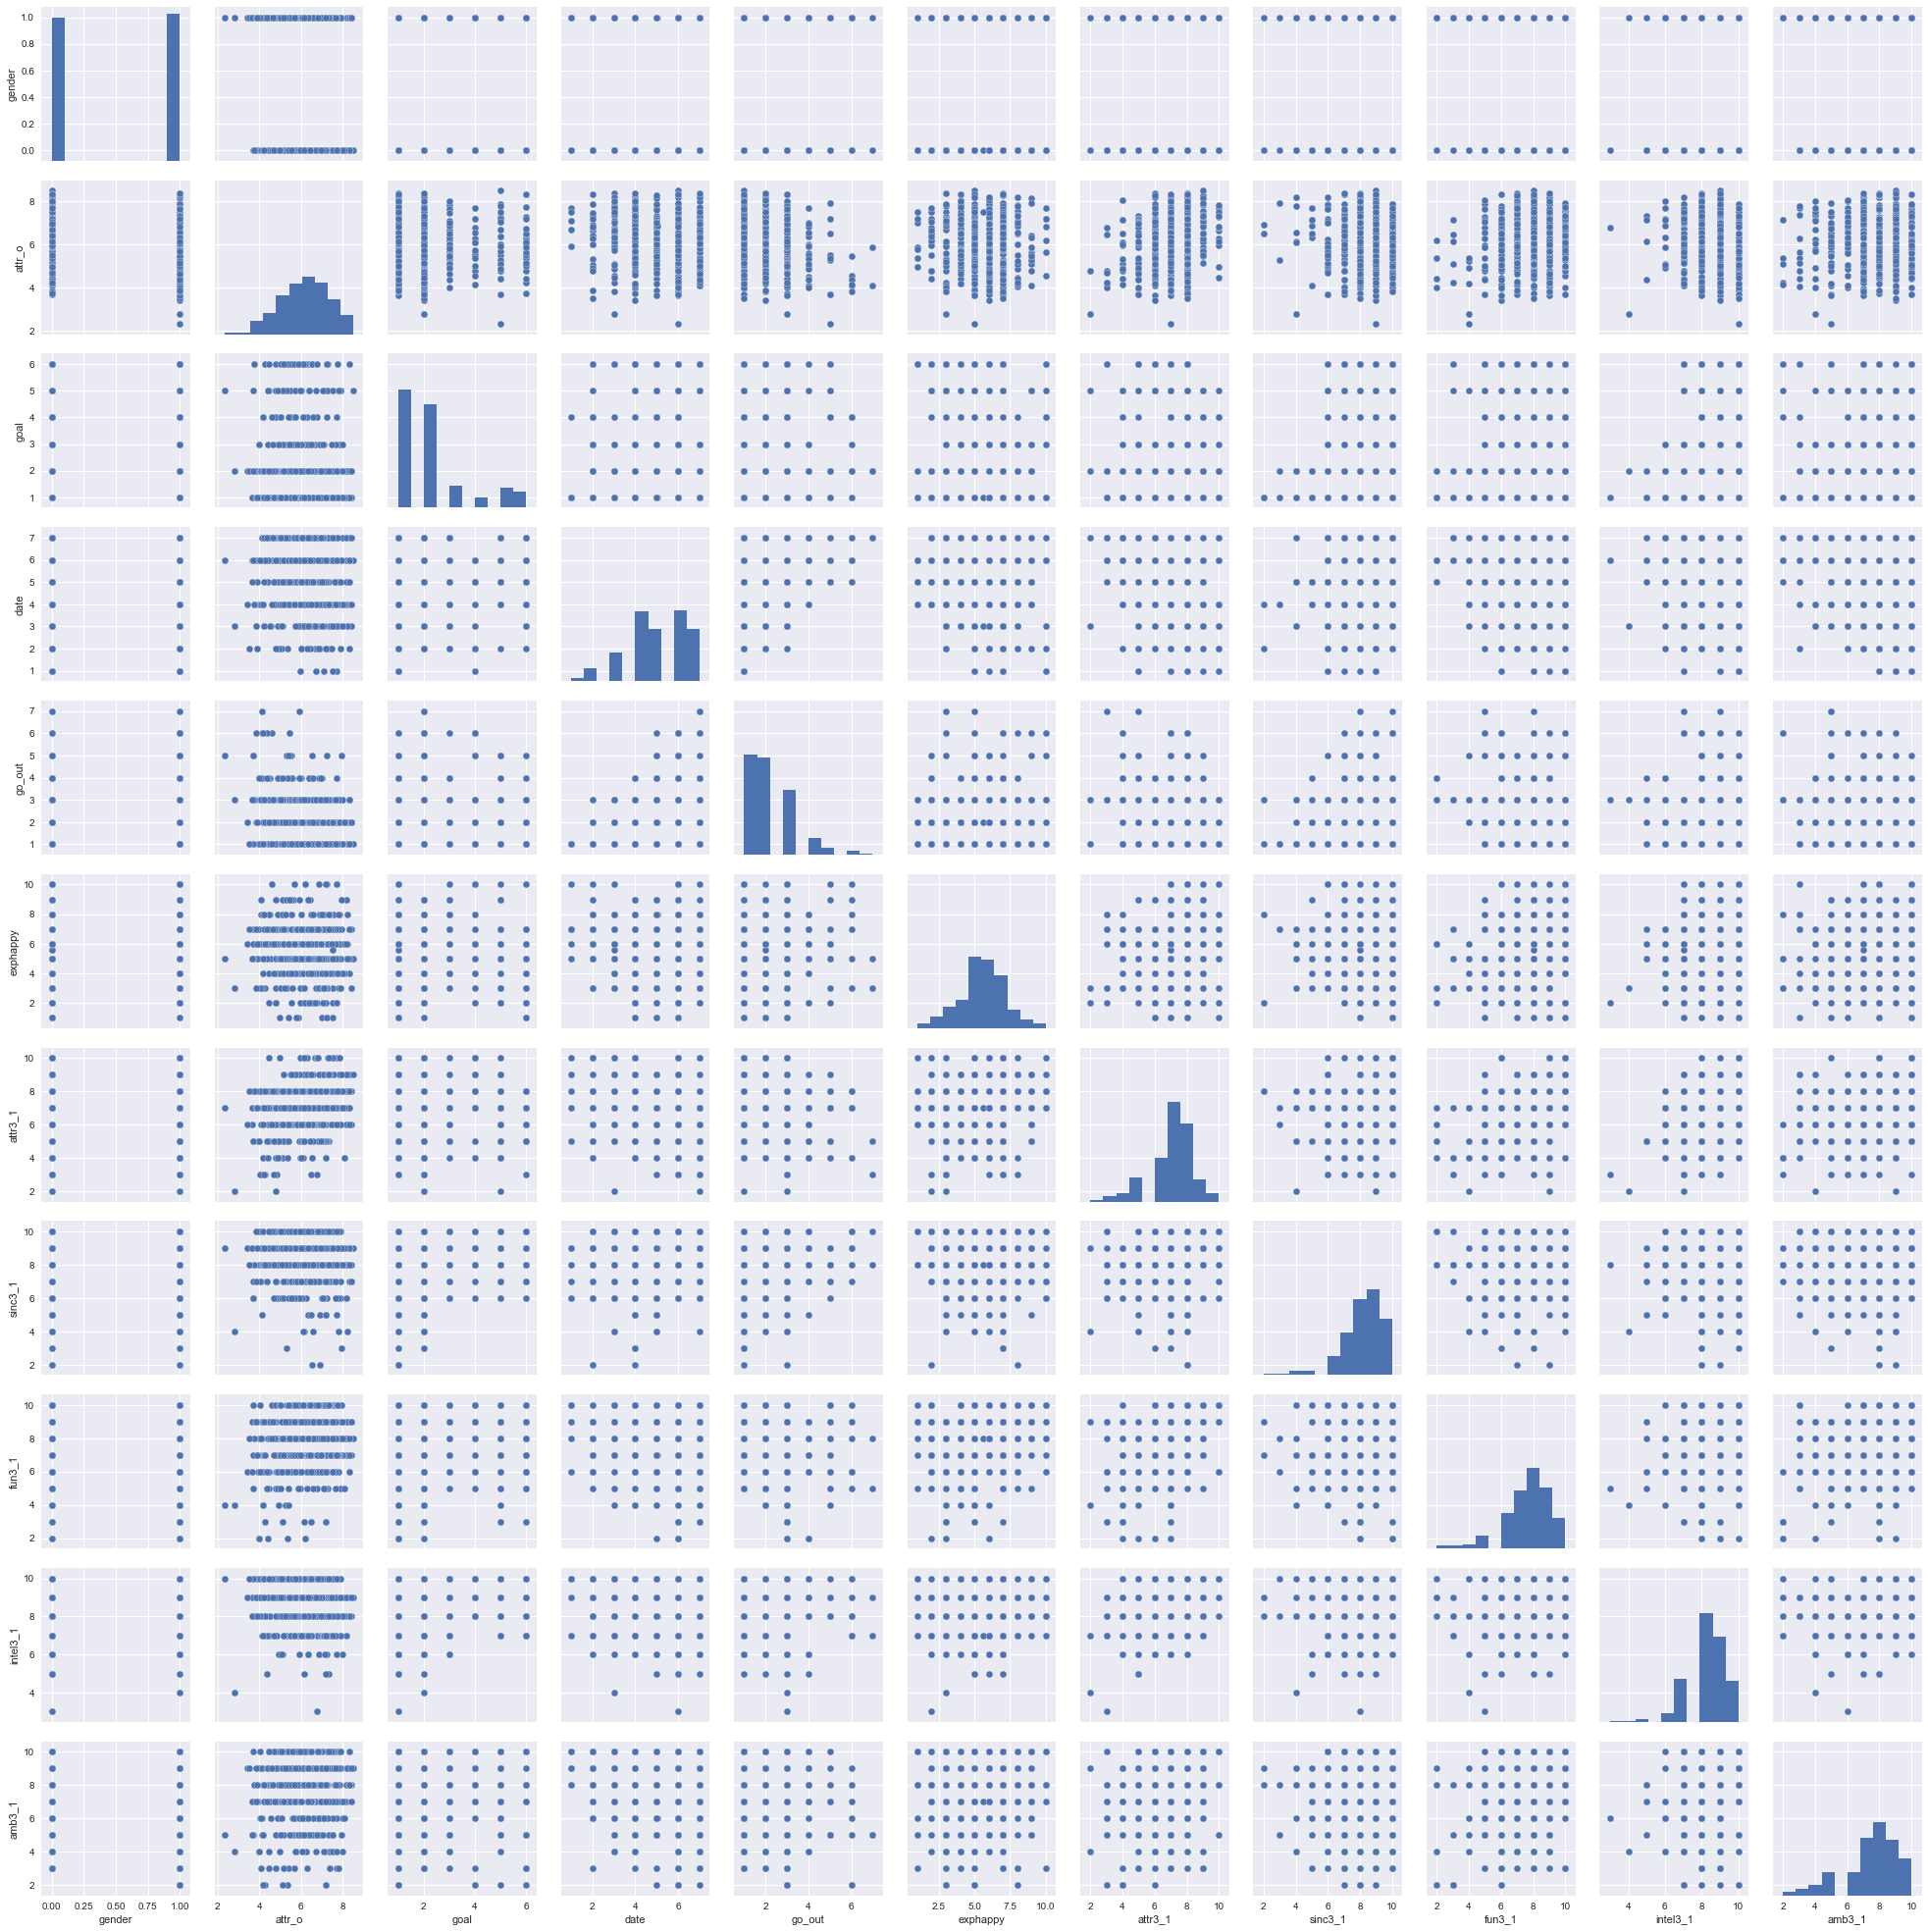

In [126]:
sns.pairplot(p_mtx)

# Linear Regression

In [151]:
from sklearn.model_selection import train_test_split
X = p_mtx.drop('attr_o', axis=1)
y = p_mtx.attr_o

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state =8 )

In [152]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression() 
model = lr.fit(X_train,y_train) 
predictions = lr.predict(X_test)
lr.score(X_test, y_test) 

0.22631568086210152

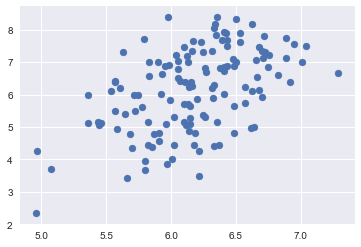

In [153]:
plt.scatter(predictions, y_test);

In [154]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

for folds in range(5,11): # Here we're just declaring how many k-folds we want our model to loop through
    lr = LinearRegression() # Scikit-learn has made it so cross_val is even more intuitive and fits the model AND cross-validates it in the same step
    scores = cross_val_score(lr, X, y, cv=folds) # For every new number of folds, we are pulling out the scores 
    # For every time (k) we cross-validate the model (which is also being fit in that same step)
    print str(folds)+" Cross-validated scores:", scores # we're then asking it to print scores for every single time it does this
    # Make cross-validated predictions
    predictions = cross_val_predict(model, X, y, cv=folds) # and its predictions
    accuracy = metrics.r2_score(y, predictions) # We're then looking at the r2 of the predicted values vs. our actual values. 
    print str(folds)+" Cross-Predicted Accuracy:", accuracy # and printing that out
    # Extra space for printing
    print

5 Cross-validated scores: [ 0.31863729  0.24416857  0.07728061  0.1114554   0.1956358 ]
5 Cross-Predicted Accuracy: 0.201221834234

6 Cross-validated scores: [ 0.33547278  0.27979607  0.10715297 -0.06092472  0.24113457  0.04417324]
6 Cross-Predicted Accuracy: 0.199357049229

7 Cross-validated scores: [ 0.3435488   0.20955137  0.19839644  0.05457615 -0.00367528  0.31293857
 -0.00453199]
7 Cross-Predicted Accuracy: 0.200395437212

8 Cross-validated scores: [ 0.39706678  0.20890467  0.3248192   0.00926945 -0.03410846  0.02523848
  0.31606039 -0.05526599]
8 Cross-Predicted Accuracy: 0.200341501589

9 Cross-validated scores: [ 0.4254004   0.22865178  0.27500227 -0.01884688  0.06888532  0.02814804
  0.10659878  0.3427027  -0.17976922]
9 Cross-Predicted Accuracy: 0.19674400532

10 Cross-validated scores: [ 0.46464472  0.11733299  0.26059421  0.1986477   0.15712154  0.00818655
 -0.08470018  0.24705148  0.33244398 -0.2166434 ]
10 Cross-Predicted Accuracy: 0.197844429255



### Decision Trees

In [156]:
# Try Regression Tree first
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [162]:
# Instantiate a DecisionTreeRegressor (with random_state=1).
from sklearn.tree import DecisionTreeRegressor

treereg = DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [163]:
# Use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

1.5544099796200079

In [164]:
# List of values to try:
max_depth_range = range(1, 8)

# List to store the average RMSE for each value of max_depth:
RMSE_scores = []

# Use LOOCV with each value of max_depth.
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

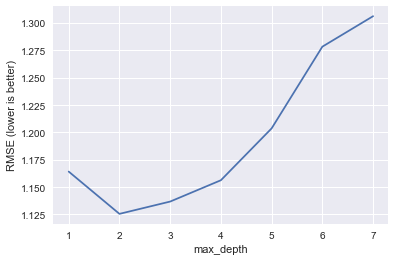

In [165]:
# Plot max_depth (x-axis) versus RMSE (y-axis).
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE (lower is better)');

In [166]:
# max_depth = 2 is best
treereg = DecisionTreeRegressor(random_state=1, max_depth=depth)
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

1.3063080820660748

In [172]:
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [173]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature.
pd.DataFrame({'feature':X.columns, 'importance':treereg.feature_importances_})

,feature,importance
0,gender,0.113891
1,goal,0.056253
2,date,0.082298
3,go_out,0.208482
4,exphappy,0.045515
5,attr3_1,0.128504
6,sinc3_1,0.079977
7,fun3_1,0.108261
8,intel3_1,0.124704
9,amb3_1,0.052116


** Re-examine data and perhaps remove some features. **

** Possibly separate data by gender and repeat prediction.  Prediction models for male and female may be different **